In [81]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns


Importing basic libraries needed for this project. any other function used any futher are imported later as they are used

In [82]:
iris = pd.read_csv("iris.csv")
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
110,111,6.5,3.2,5.1,2.0,Iris-virginica
16,17,5.4,3.9,1.3,0.4,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
25,26,5.0,3.0,1.6,0.2,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


First glance at the data

In [83]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


basic statistics

In [84]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


most of the features are as needed except Species as species contain categories so better to use encoding

In [98]:
print(iris["Species"].value_counts())

Species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


In [99]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_en = OrdinalEncoder()

iris["Species"] = ordinal_en.fit_transform(iris[["Species"]])

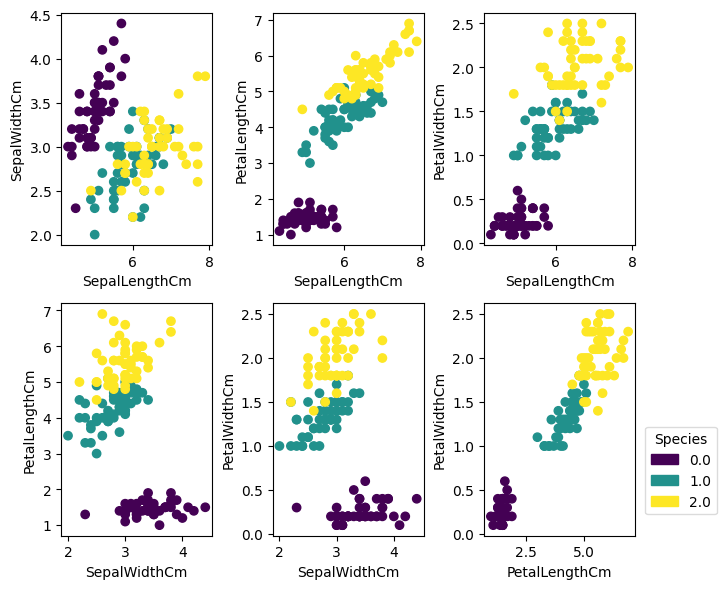

In [100]:
from matplotlib.patches import Patch

categories = ordinal_en.categories_[0]
colors = [ plt.cm.viridis(i/2) for i in range(3)] 
legend_handles = [Patch(color = colors[i], label = categories[i]) for i in range(3)]

col = iris.columns

fig, ax = plt.subplots(2,3, figsize=(8,6))

a = b= 0
for x in range(1, 5):
    for y in range(x+1, 5):
        if(col[x]==col[y]):
            continue
            print(col[x], col[y])
        ax[a,b].scatter(iris[col[x]], iris[col[y]], c = iris["Species"], cmap = 'viridis')
        ax[a,b].set_xlabel(col[x]);
        ax[a,b].set_ylabel("{}".format(col[y]));
        b+=1
        if (b==3):
            a+=1
            b = 0
plt.legend(handles = legend_handles, title="Species", bbox_to_anchor=(1.02, 0.5),framealpha = 0.7)
plt.tight_layout()
plt.subplots_adjust(right = 0.8)
plt.show()

Looking at the graphs, it can be observered that data can be classified by a linear model like SVM with linear kernel

<Axes: >

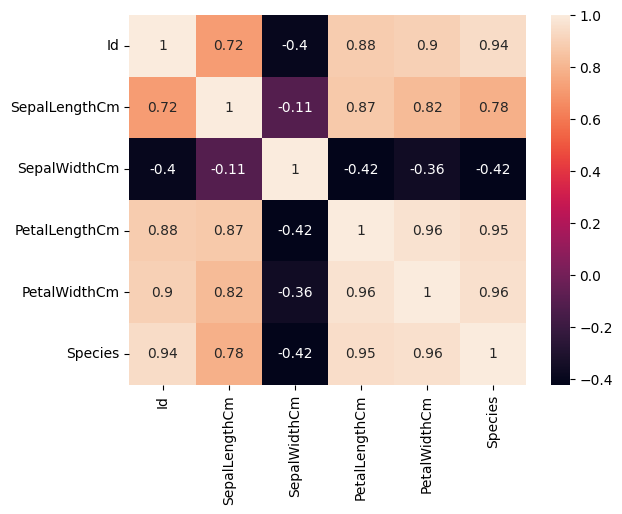

In [101]:
corr_mat = iris.corr()
sns.heatmap(corr_mat, annot = True)

Most important features can be seen are SepalLength, PetalLength, PetalWidth, so better to use these feature only

most important features are petal dimension and also sepallength

In [118]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_ind, test_ind in split.split(iris, iris["Species"]):
    iris_train = iris.iloc[train_ind]
    iris_test = iris.iloc[test_ind]
print("orig set: ",iris["Species"].value_counts() / len(iris))
print("train set: ",iris_train["Species"].value_counts() / len(iris_train))
print("test set: ",iris_test["Species"].value_counts() / len(iris_test))

orig set:  Species
0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: count, dtype: float64
train set:  Species
0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: count, dtype: float64
test set:  Species
0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: count, dtype: float64


doing stratified spliting of data to ensures that each class is represented proportionally in both the training and test sets

In [157]:
features = ["SepalLengthCm", "PetalLengthCm", "PetalWidthCm"]
x_train = iris_train.loc[:, features]
y_train = iris_train["Species"]

precision:  [1.         1.         0.95238095] 
Recall :  [1.   0.95 1.  ]


<Axes: >

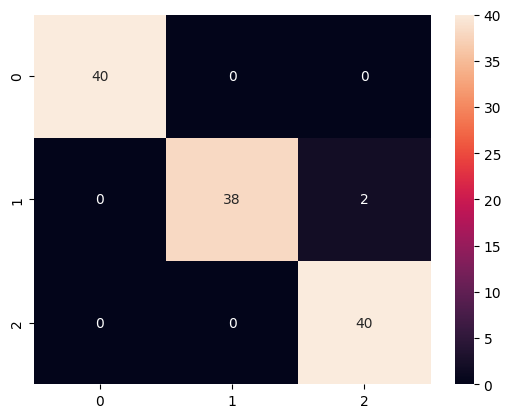

In [131]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve

svm_clf = SVC(kernel = "linear", decision_function_shape="ovr")

y_pred_svm = cross_val_predict(svm_clf, x_train, y_train, cv = 6)

conf_mat_svm = confusion_matrix(y_train, y_pred_svm)
print("precision: ", precision_score(y_train, y_pred_svm, average = None ), "\nRecall : ", recall_score(y_train, y_pred_svm, average = None))
sns.heatmap(conf_mat_svm, annot=True)

that's a nice score

precision:  [1.         1.         0.95238095] 
Recall :  [1.   0.95 1.  ]


<Axes: >

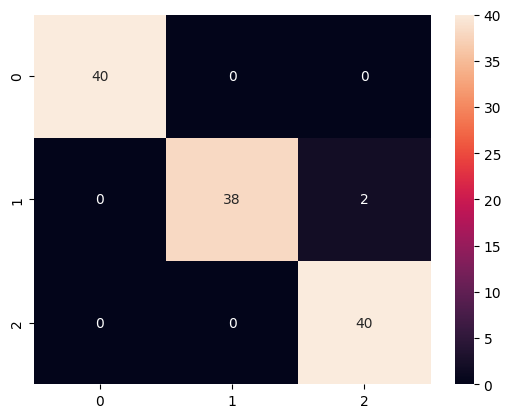

In [133]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

y_pred_f = cross_val_predict(forest_clf, x_train, y_train, cv = 6)

conf_mat_svm = confusion_matrix(y_train, y_pred_svm)
print("precision: ", precision_score(y_train, y_pred_svm, average = None ), "\nRecall : ", recall_score(y_train, y_pred_svm, average = None))
sns.heatmap(conf_mat_svm, annot=True)


that's a good score, as expect a linear will be sufficient

Lets do some regularization to get best model, iam using f1 weighted scoore for the evaluation of a model, using RandomizedSearchCV

In [134]:

from sklearn.model_selection import RandomizedSearchCV

param_grid = { "C": np.arange(1, 101)}
search_cv = RandomizedSearchCV(svm_clf, param_distributions=param_grid, n_iter=32, cv = 6, scoring="f1_weighted"
                             , random_state = 31 )


search_cv.fit(x_train, y_train)
search_cv.best_estimator_

SVC(C=1, kernel='linear')

In [135]:
cvres = search_cv.cv_results_

for f1_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f1_score, params)

0.966468253968254 {'C': 18}
0.9580921855921857 {'C': 34}
0.9580921855921857 {'C': 77}
0.966468253968254 {'C': 4}
0.9580921855921857 {'C': 57}
0.9833333333333334 {'C': 1}
0.9580921855921857 {'C': 38}
0.9580339105339105 {'C': 9}
0.9580921855921857 {'C': 61}
0.9580921855921857 {'C': 68}
0.9580921855921857 {'C': 37}
0.966468253968254 {'C': 8}
0.9580921855921857 {'C': 60}
0.9580921855921857 {'C': 74}
0.9580921855921857 {'C': 35}
0.9580921855921857 {'C': 75}
0.9580921855921857 {'C': 44}
0.9580921855921857 {'C': 48}
0.9580921855921857 {'C': 81}
0.966468253968254 {'C': 3}
0.9580339105339105 {'C': 15}
0.966468253968254 {'C': 16}
0.9580921855921857 {'C': 21}
0.9580921855921857 {'C': 40}
0.9580921855921857 {'C': 23}
0.9580921855921857 {'C': 70}
0.9580921855921857 {'C': 79}
0.9580921855921857 {'C': 39}
0.9580921855921857 {'C': 20}
0.9580921855921857 {'C': 64}
0.9580921855921857 {'C': 22}
0.9580921855921857 {'C': 80}


In [136]:
final_model = search_cv.best_estimator_


In [137]:
x_test = iris_test[x_train.columns]
y_test = iris_test["Species"]

final_model.fit(x_train, y_train)
y_test_pred = final_model.predict(x_test)



precision:  [1. 1. 1.] 
Recall :  [1. 1. 1.]


<Axes: >

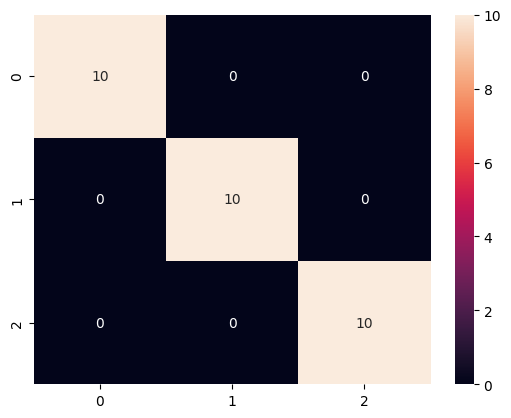

In [138]:
print("precision: ", precision_score(y_test, y_test_pred, average = None ), "\nRecall : ", recall_score(y_test, y_test_pred, average = None))
conf_test_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_test_mat, annot=True)

Pretty good score

In [160]:
# saving the model
import joblib
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']